In [141]:
# use nx to create topology graph
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from dfederation import SKNode, get_data, FederatedCommunity

In [142]:
# Function for fully connected topology:
def fullyconnectedtopo(n): 
    for i in range(1, n+1):
        topo.add_node(i)
        for j in range(1, n+1):
            while i != j:
                topo.add_edge(i, j)
                topo.add_edge(j, i)
                break

# Function for star topology:
def hubnspoketopo(n):
    for i in range(1, n+1):
        topo.add_node(i)
        for j in range(1, n+1):
            if i != j:
                topo.add_edge(i, j)
                topo.add_edge(j, i)
                break

# Function for polgyon topology:
def chaintopo(n):
    for i in range(1,n):
        topo.add_node(i)
        topo.add_edge(i, i+1)

# Function for ring topology:
def ringtopo(n):
    for i in range(1, n+1):
        topo.add_node(i)
        topo.add_edge(i, i+1)
        if i == n:
            topo.add_edge(n, 1)
            topo.remove_node(n+1)


Final score is:  0.8694444444444445


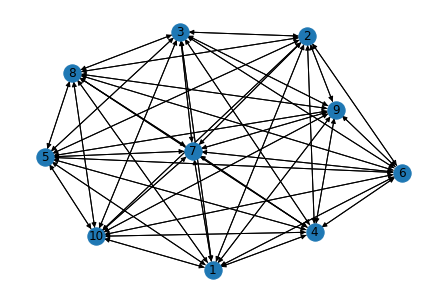

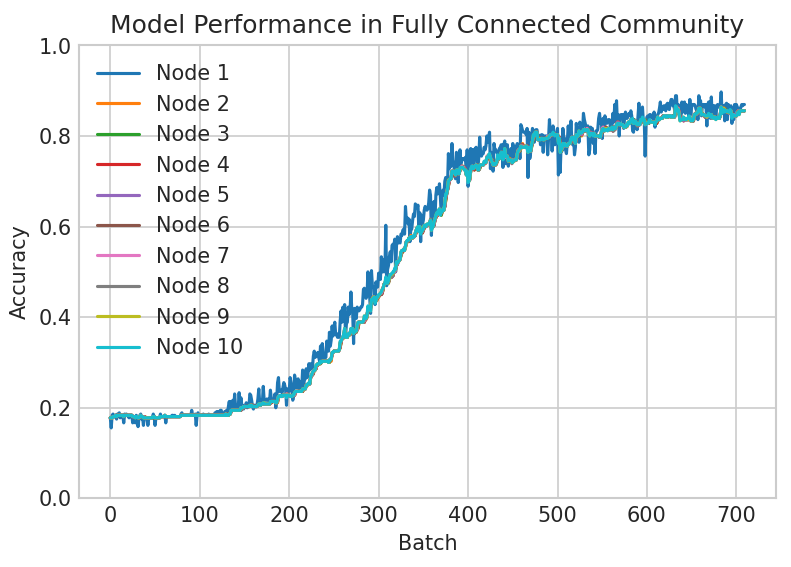

In [143]:
# Create fully connected community:
topo = nx.DiGraph()
numnodes = 10
fullyconnectedtopo(numnodes)

# Create the models:
for node in topo.nodes:
    model = linear_model.SGDClassifier()
    topo.nodes[node]['node'] = SKNode(
        model=model,
        labels=list(range(numnodes)),
        node_id=node)

# Draw complete topology:
nx.draw(topo, with_labels=True)
plt.savefig('fctopo.png')

# Get dataset (MNIST):
X_train, X_test, y_train, y_test = train_test_split(
    get_data()['images'], get_data()['target'], 
    test_size=0.2, shuffle=True, random_state=42
)

# Show sample from data:
# plt.imshow(X_train[0])

# Create federated community:
# for i in range(1,numnodes+1):
comm = FederatedCommunity(topo)

X_train_raveled = [x.ravel() for x in X_train]
X_test_raveled = [x.ravel() for x in X_test]

# Train models:
for node_id in topo.nodes:
    comm.train(X_train_raveled[:2], y_train[:2], node_id)

# Get predictions for each node:
comm.get_scores(X_test_raveled, y_test)

# Train models and communicate:
scores_per_node_over_time = []
iterations = 710

for batch in range(iterations):
    comm.train(X_train_raveled[batch*2:(batch+1)*2], y_train[batch*2:(batch+1)*2], 1)
    comm.communicate(times=10)
    scores_per_node_over_time.append(comm.get_scores(X_test_raveled, y_test))

# Plot the scores over time. Each node gets its own line.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4), dpi=150)
    for node_id in scores_per_node_over_time[0]:
        plt.plot(
            [scores_per_node_over_time[i][node_id] for i in range(len(scores_per_node_over_time))],
            label=f"Node {node_id}"
        )
    plt.legend()
    plt.xlabel("Batch")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)
    plt.title("Model Performance in Fully Connected Community")
    plt.savefig("FullyConnected.png")
print("Final score is: ", scores_per_node_over_time[-1][1])

Final score is:  0.9222222222222223


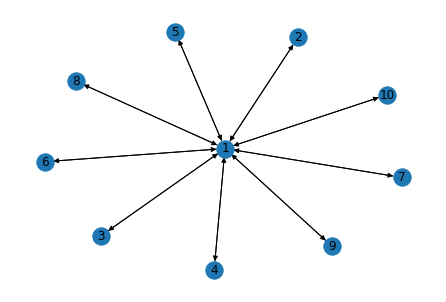

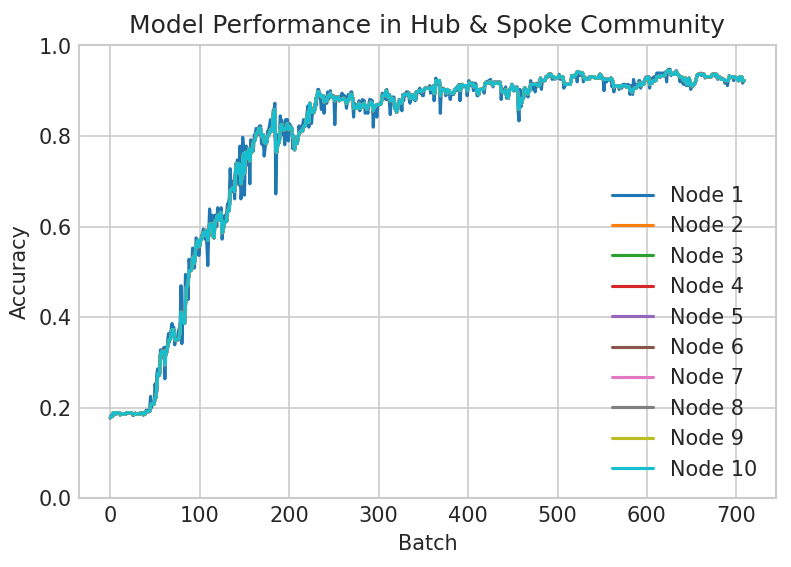

In [144]:
# Create a hub and spoke community:
topo = nx.DiGraph()
numnodes = 10
hubnspoketopo(numnodes)

# Create the models:
for node in topo.nodes:
    model = linear_model.SGDClassifier()
    topo.nodes[node]['node'] = SKNode(
        model=model,
        labels=list(range(numnodes)),
        node_id=node)

# Draw complete topology:
nx.draw(topo, with_labels=True)
plt.savefig('hubnspoketopo.png')

# Get dataset (MNIST):
X_train, X_test, y_train, y_test = train_test_split(
    get_data()['images'], get_data()['target'], 
    test_size=0.2, shuffle=True, random_state=42
)

# Show sample from data:
# plt.imshow(X_train[0])

# Create federated community:
# for i in range(1,numnodes+1):
comm = FederatedCommunity(topo)

X_train_raveled = [x.ravel() for x in X_train]
X_test_raveled = [x.ravel() for x in X_test]

# Train models:
for node_id in topo.nodes:
    comm.train(X_train_raveled[:2], y_train[:2], node_id)

# Get predictions for each node:
comm.get_scores(X_test_raveled, y_test)

# Train models and communicate:
scores_per_node_over_time = []
iterations = 710

for batch in range(iterations):
    comm.train(X_train_raveled[batch*2:(batch+1)*2], y_train[batch*2:(batch+1)*2], 1)
    comm.communicate(times=10)
    scores_per_node_over_time.append(comm.get_scores(X_test_raveled, y_test))

# Plot the scores over time. Each node gets its own line.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4), dpi=150)
    for node_id in scores_per_node_over_time[0]:
        plt.plot(
            [scores_per_node_over_time[i][node_id] for i in range(len(scores_per_node_over_time))],
            label=f"Node {node_id}"
        )
    plt.legend()
    plt.xlabel("Batch")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)
    plt.title("Model Performance in Hub & Spoke Community")
    plt.savefig("hub_spoke_community.png")
print("Final score is: ", scores_per_node_over_time[-1][1])

Final score is:  0.9166666666666666


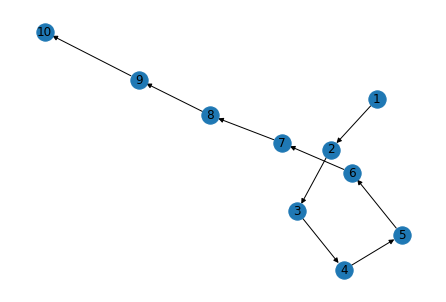

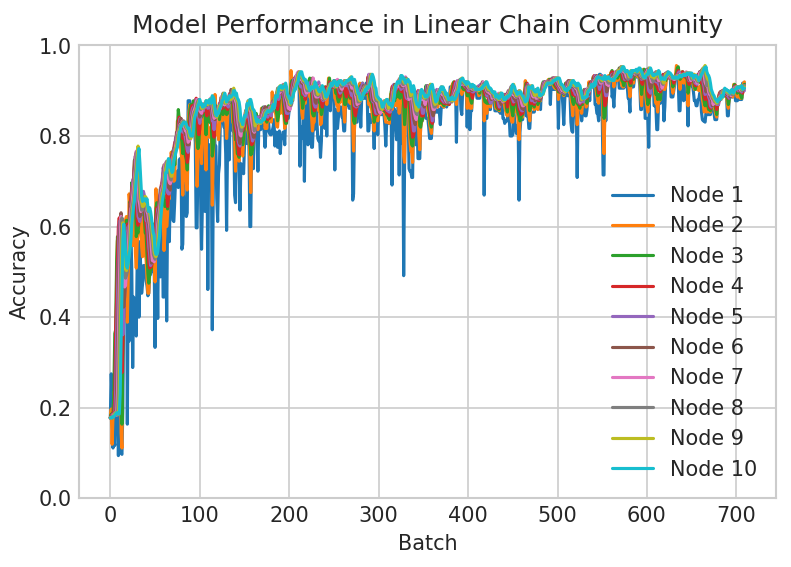

In [145]:
# Create a chain community:
topo = nx.DiGraph()
numnodes = 10
chaintopo(numnodes)

# Create the models:
for node in topo.nodes:
    model = linear_model.SGDClassifier()
    topo.nodes[node]['node'] = SKNode(
        model=model,
        labels=list(range(numnodes)),
        node_id=node)

# Draw complete topology:
nx.draw(topo, with_labels=True)
plt.savefig('chaintopo.png')

# Get dataset (MNIST):
X_train, X_test, y_train, y_test = train_test_split(
    get_data()['images'], get_data()['target'], 
    test_size=0.2, shuffle=True, random_state=42
)

# Show sample from data:
# plt.imshow(X_train[0])

# Create federated community:
# for i in range(1,numnodes+1):
comm = FederatedCommunity(topo)

X_train_raveled = [x.ravel() for x in X_train]
X_test_raveled = [x.ravel() for x in X_test]

# Train models:
for node_id in topo.nodes:
    comm.train(X_train_raveled[:2], y_train[:2], node_id)

# Get predictions for each node:
comm.get_scores(X_test_raveled, y_test)

# Train models and communicate:
scores_per_node_over_time = []
iterations = 710

for batch in range(iterations):
    comm.train(X_train_raveled[batch*2:(batch+1)*2], y_train[batch*2:(batch+1)*2], 1)
    comm.communicate(times=10)
    scores_per_node_over_time.append(comm.get_scores(X_test_raveled, y_test))

# Plot the scores over time. Each node gets its own line.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4), dpi=150)
    for node_id in scores_per_node_over_time[0]:
        plt.plot(
            [scores_per_node_over_time[i][node_id] for i in range(len(scores_per_node_over_time))],
            label=f"Node {node_id}"
        )
    plt.legend()
    plt.xlabel("Batch")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)
    plt.title("Model Performance in Linear Chain Community")
    plt.savefig("chain_community.png")
print("Final score is: ", scores_per_node_over_time[-1][1])

Final score is:  0.9305555555555556


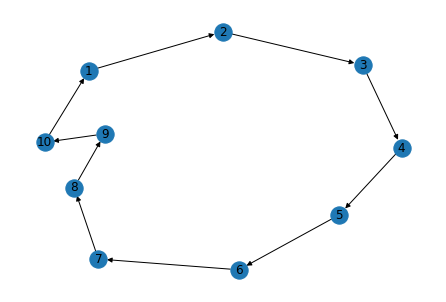

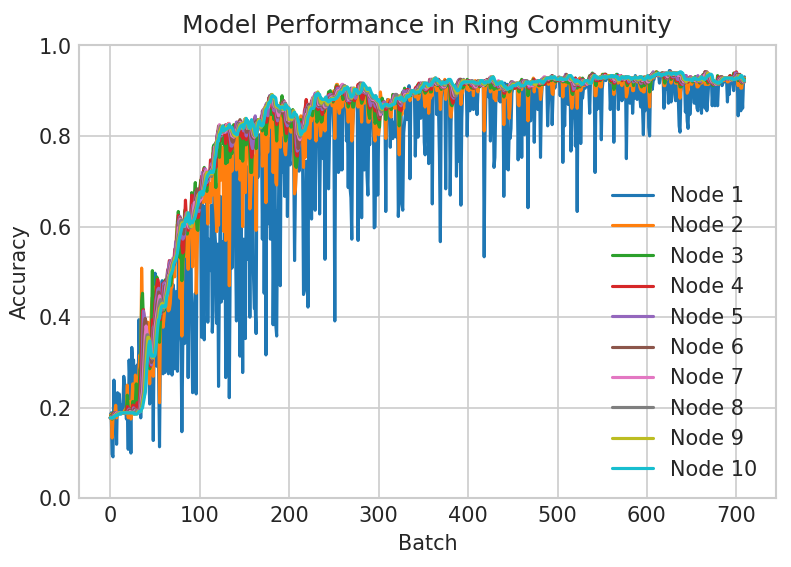

In [146]:
# Create a ring community:
topo = nx.DiGraph()
numnodes = 10
ringtopo(numnodes)

# Create the models:
for node in topo.nodes:
    model = linear_model.SGDClassifier()
    topo.nodes[node]['node'] = SKNode(
        model=model,
        labels=list(range(numnodes)),
        node_id=node)

# Draw complete topology:
nx.draw(topo, with_labels=True)
plt.savefig('ringtopo.png')

# Get dataset (MNIST):
X_train, X_test, y_train, y_test = train_test_split(
    get_data()['images'], get_data()['target'], 
    test_size=0.2, shuffle=True, random_state=42
)

# Show sample from data:
# plt.imshow(X_train[0])

# Create federated community:
# for i in range(1,numnodes+1):
comm = FederatedCommunity(topo)

X_train_raveled = [x.ravel() for x in X_train]
X_test_raveled = [x.ravel() for x in X_test]

# Train models:
for node_id in topo.nodes:
    comm.train(X_train_raveled[:2], y_train[:2], node_id)

# Get predictions for each node:
comm.get_scores(X_test_raveled, y_test)

# Train models and communicate:
scores_per_node_over_time = []
iterations = 710

for batch in range(iterations):
    comm.train(X_train_raveled[batch*2:(batch+1)*2], y_train[batch*2:(batch+1)*2], 1)
    comm.communicate(times=10)
    scores_per_node_over_time.append(comm.get_scores(X_test_raveled, y_test))

# Plot the scores over time. Each node gets its own line.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4), dpi=150)
    for node_id in scores_per_node_over_time[0]:
        plt.plot(
            [scores_per_node_over_time[i][node_id] for i in range(len(scores_per_node_over_time))],
            label=f"Node {node_id}"
        )
    plt.legend()
    plt.xlabel("Batch")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1)
    plt.title("Model Performance in Ring Community")
    plt.savefig("ring_community.png")
print("Final score is: ", scores_per_node_over_time[-1][1])